In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
data = np.array(
    [[1, 1, 1],
    [1, 2, 1],
    [2, 1, 1],
    [2, 2, 1],
    [3, 3, 0],
    [-1, 1, 1],
    [-2, 1, 1],
    [-3, 1, 1],
    [-3, 2, 0],
    [1, -1, 1],
    [1, -2, 1],
    [2, -1, 0],
    [-1, -1, 1],
    [-2, -2, 0]]
)

df = pd.DataFrame(data)
df = df.rename(columns={0: 'x', 1: 'y', 2: 'label'})
df.head()

,x,y,label
0,1,1,1
1,1,2,1
2,2,1,1
3,2,2,1
4,3,3,0


In [3]:
def plot_dataset(df, ax=None):
    
    ax.scatter(x='x', y='y', data=df[df['label'] == 0], color='red')
    ax.scatter(x='x', y='y', data=df[df['label'] == 1], color='green')
    
def decision_boundary(model, df, ax=None):
    
    max_x = np.max(df['x']) + 1
    max_y = np.max(df['y']) + 1
    
    min_x = np.min(df['x']) - 1
    min_y = np.min(df['y']) - 1
    
    xs = np.linspace(min_x, max_x, 200)
    ys = np.linspace(min_y, max_y, 200)
    zs = np.zeros((200, 200))

    for i,x in enumerate(xs):
        for j,y in enumerate(ys):
            zs[j, i] = model.predict(np.array([[x, y]]))[0]

    ax.contour(xs, ys, zs, levels=(-1, 0, 1), linewidths=2, colors='black', alpha=0.5)
    ax.contourf(xs, ys, zs, levels=(-1, 0, 1), colors=('#ff0000', '#00ff00'), alpha=0.2)

    ax.scatter(x='x', y='y', data=df[df['label'] == 0], color='red')
    ax.scatter(x='x', y='y', data=df[df['label'] == 1], color='green')
    
    ax.set_xlim((min_x, max_x))
    ax.set_ylim((min_y, max_y))

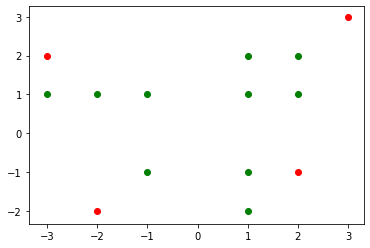

In [4]:
fig, ax = plt.subplots()

plot_dataset(df, ax)

In [5]:
from sklearn.tree import DecisionTreeClassifier

In [6]:
tree = DecisionTreeClassifier(criterion='gini', max_depth=2, random_state=42)

tree.fit(X=df[['x', 'y']].values, y=df[['label']].values)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=42, splitter='best')

C:\Users\mitbal\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: UserWarning: No contour levels were found within the data range.


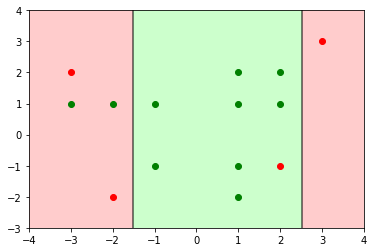

In [7]:
fig, ax = plt.subplots()

decision_boundary(tree, df, ax)

In [8]:
test = np.array(
    [[0, 0],
     [2, -2],
     [-1, 3],
     [-3, 4],
     [-4, -2],
     [3, 0]]
)

In [9]:
tree.predict_proba(test)[:, 1]

array([0.88888889, 0.88888889, 0.88888889, 0.5       , 0.5       ,
       0.        ])